# Library Decleration

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import seaborn as sb
import numpy as np
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


# Uniqness of Categorical Data

In [8]:
print(dta.occupation.unique())
print(dta.occupation_husb.unique())

[2. 3. 5. 4. 1. 6.]
[5. 4. 3. 2. 6. 1.]


# Data Visulaisation

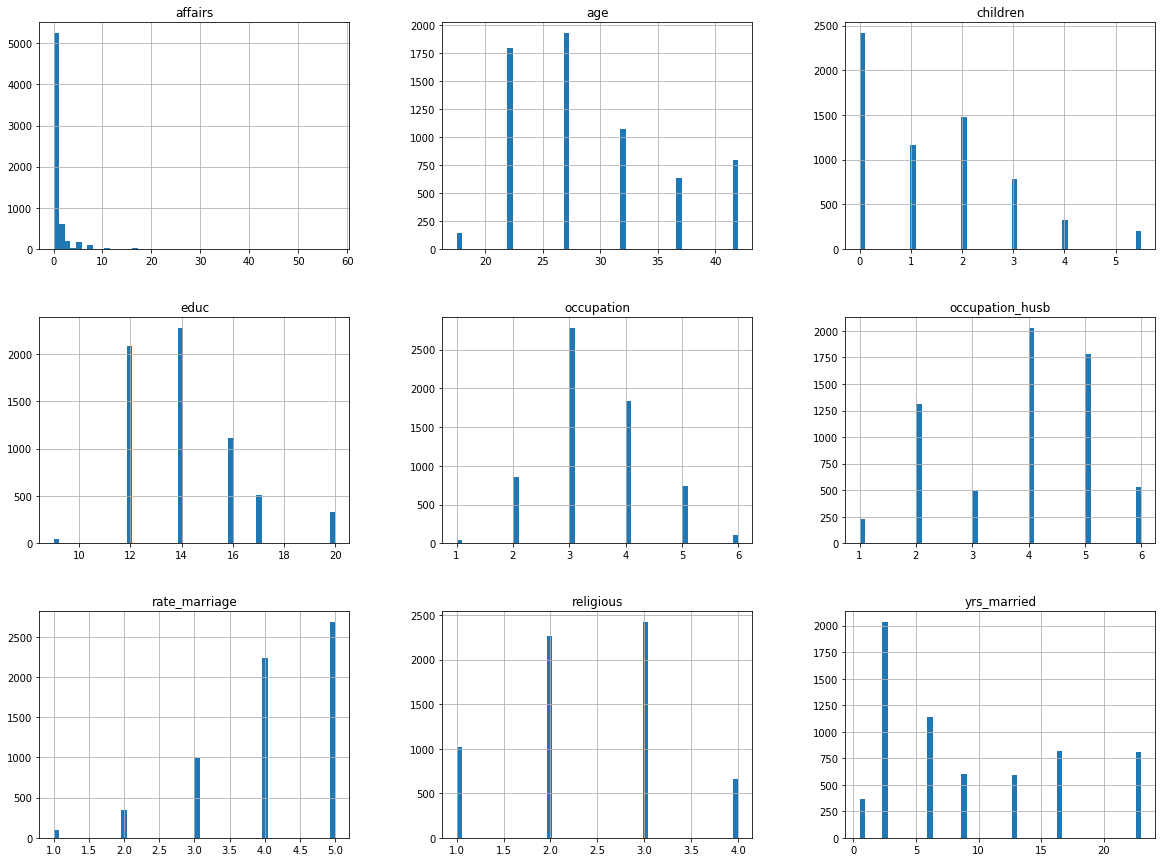

In [9]:
dta.hist(bins=50, figsize=(20,15))
plt.show()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,True,False,False,False,False,False,False,False,False,False
age,False,True,True,False,False,False,False,False,False,False
yrs_married,False,True,True,False,False,False,False,False,False,False
children,False,False,False,True,False,False,False,False,False,False
religious,False,False,False,False,True,False,False,False,False,False
educ,False,False,False,False,False,True,False,False,False,False
occupation,False,False,False,False,False,False,True,False,False,False
occupation_husb,False,False,False,False,False,False,False,True,False,False
affairs,False,False,False,False,False,False,False,False,True,False
affair,False,False,False,False,False,False,False,False,False,True


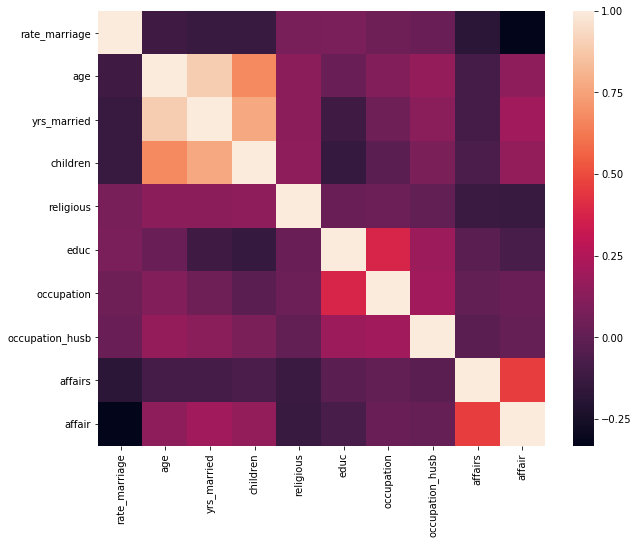

In [28]:
plt.figure(figsize=(10,8))
sb.heatmap(dta.corr())
dta.corr()>0.8

# Inserting unity intercept and Coversion of categorical data to Continuous data using dmatrices

In [11]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [12]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [13]:
print(y)

[1. 1. 1. ... 0. 0. 0.]


# Train and Test Split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)


# Implementation of Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluation of Model

In [26]:
print(model.score(x_train,y_train))


0.7248653500897666


In [17]:
pre=model.predict(x_test)
pre

array([0., 0., 1., ..., 0., 1., 0.])

In [42]:
print(metrics.accuracy_score(y_test,pre))


0.7146596858638743


In [19]:
prob = model.predict_proba(x_test)
prob

array([[0.73902034, 0.26097966],
       [0.70738622, 0.29261378],
       [0.33621575, 0.66378425],
       ...,
       [0.89617558, 0.10382442],
       [0.4008524 , 0.5991476 ],
       [0.89746765, 0.10253235]])

In [21]:
print(metrics.roc_auc_score(y_test, prob[:, 1]))

0.7315718689462665


In [22]:
print(metrics.confusion_matrix(y_test, pre))
print(metrics.classification_report(y_test, pre))

[[1142  121]
 [ 424  223]]
             precision    recall  f1-score   support

        0.0       0.73      0.90      0.81      1263
        1.0       0.65      0.34      0.45       647

avg / total       0.70      0.71      0.69      1910



In [23]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

# Implementing model by dropping the columns whose correlation >=0.8

In [24]:
x_new=X.drop('yrs_married', axis=1)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=10)
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
print(model.score(x_train,y_train))


0.7248653500897666


In [36]:
pro = model.predict_proba(x_test) 
print(metrics.accuracy_score(y_test,predict))
print(metrics.roc_auc_score(y_test, pro[: , 1]))

0.7078534031413612
0.7170312826970451


In [40]:
print(metrics.confusion_matrix(y_test,predict))
print(metrics.classification_report(y_test,predict))

[[1142  121]
 [ 437  210]]
             precision    recall  f1-score   support

        0.0       0.72      0.90      0.80      1263
        1.0       0.63      0.32      0.43       647

avg / total       0.69      0.71      0.68      1910



In [41]:
scores = cross_val_score(LogisticRegression(), x_new, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.71630094, 0.68652038, 0.73824451, 0.71226415, 0.69968553,
        0.72798742, 0.71540881, 0.70283019, 0.73584906, 0.75628931]),
 0.7191380296129808)

# Since yrs_married has some additional impact on True Negatives. When yrs_married is dropped model score is same but ROC and Accuracy value is not same.So, considering yrs_married is preffered to have good model. 